Laboratorio 2 (Regresion lineal) Grupo 2

Implementacion de Regresion lineal para un entrenamiento que permita lograr el menor error de costo posible


NOMBRE: AMADOR YUCRA LUIS FERNANDO 

CARRERA: INGENIERIA DE SISTEMAS

FECHA: 

LINK DE GITHUB: 

LINK DE COLAB: https://colab.research.google.com/drive/1Fx6umbfZbnK5VNHjAkvlJbrsY_hPf8_g

Para el laboratorio hizo uso del dataset para predecir la clasificacion de temas de noticias.

El enlace al dataset es https://www.kaggle.com/datasets/manutrex78/reuters-newswire-topics-dataset

El archivo Reuters Newswire Topics Dataset.csv contiene un Conjunto de datos de temas de noticias de Reuters.

1. regresion lineal multivariable

In [3]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 80% y 20%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

1.1 Cargamos los datos del dataset

cargamos los datos haciendo el uso de la libreria Pandas que es una herramienta poderosa y versátil utilizada para manipulación y análisis de datos. Ofrece estructuras de datos flexibles y eficientes para trabajar con datos tabulares, como hojas de cálculo en Excel o tablas SQL. Algunas de las funcionalidades clave de pandas incluyen:

In [4]:
data = pd.read_csv('Reuters Newswire Topics Dataset.csv', delimiter=',')

#retiramos el id y la fecha del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['id', 'date'], axis=1).astype(float)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

X_regre_test = test_dataset.drop(['price'], axis=1).values
y_regre_test = test_dataset['price'].values

# Seleccionamos las columnas para X y la columna 'price' para y
X_regre = train_dataset.drop(['price'], axis=1).values
y_regre = train_dataset['price'].values
m_regre = len(y_regre)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]', 'X[:, 11]',
    'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'Y'
))
print('-' * 180)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}{:10.0f}{:10.0f}{:10.0f}{:10.2f}{:10.2f}{:10.0f}{:11.0f}{:14.0f}'.format(
        X_regre[i, 0], X_regre[i, 1], X_regre[i, 2], X_regre[i, 3], X_regre[i, 4], X_regre[i, 5], X_regre[i, 6], X_regre[i, 7], X_regre[i, 8], X_regre[i, 9], X_regre[i, 10], X_regre[i, 11],
        X_regre[i, 12], X_regre[i, 13], X_regre[i, 14], X_regre[i, 15], X_regre[i, 16], X_regre[i, 17], y_regre[i]
    ))


KeyError: "['id', 'date'] not found in axis"

1.2 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. 

En este caso hacemos el uso de la siguiente funcion para normalizar los datos

In [5]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


Normalizando los datos

In [4]:
#llamar a featureNormalize con los datos cargados

X_norm, mu_regre, sigma_regre = featureNormalize(X_regre)

print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', '  X_norm[:, 1]', '  X_norm[:, 2]', '  X_norm[:, 3]', '  X_norm[:, 4]', '  X_norm[:, 5]', '  X_norm[:, 6]', '  X_norm[:, 7]', '  X_norm[:, 8]', '  X_norm[:, 9]', '  X_norm[:, 10]', '  X_norm[:, 11]',
    '  X_norm[:, 12]', '  X_norm[:, 13]', '  X_norm[:, 14]', '  X_norm[:, 15]', '  X_norm[:, 16]', '  X_norm[:, 17]'
))
print('-' * 172)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9], X_norm[i, 10], X_norm[i, 11],
        X_norm[i, 12], X_norm[i, 13], X_norm[i, 14], X_norm[i, 15], X_norm[i, 16], X_norm[i, 17]
    ))

print('Media calculada:', mu_regre)
print('Desviación estandar calculada:', sigma_regre)


X_norm[:,0]  X_norm[:, 1]  X_norm[:, 2]  X_norm[:, 3]  X_norm[:, 4]  X_norm[:, 5]  X_norm[:, 6]  X_norm[:, 7]  X_norm[:, 8]  X_norm[:, 9]  X_norm[:, 10]  X_norm[:, 11]  X_norm[:, 12]  X_norm[:, 13]  X_norm[:, 14]  X_norm[:, 15]  X_norm[:, 16]  X_norm[:, 17]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 -0.3953          -0.4745      -0.3239       -0.0439        -0.9196       -0.0850       -0.3059        0.9091        1.1502       -0.0073        -0.6563         0.4040        -0.2083        -0.6746        -1.3966         0.4423         1.1261         0.0134
 -1.4690          -1.4526      -1.1837       -0.2858        -0.9196       -0.0850       -0.3059       -0.6254       -1.4132       -1.2000        -0.2004        -1.4306        -0.2083         0.7506        -0.0602        -0.5400        -1.0465        -0.2807
 -0.3953          -1.4526      -1.0955       -0.1883 

1.3 Graficar las caracteristicas

graficamos cada caracteristica respecto a Y, esto para ver la relacion entre estos datos.

In [5]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y premencionada. 
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro', ms=10, mec='k')

  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

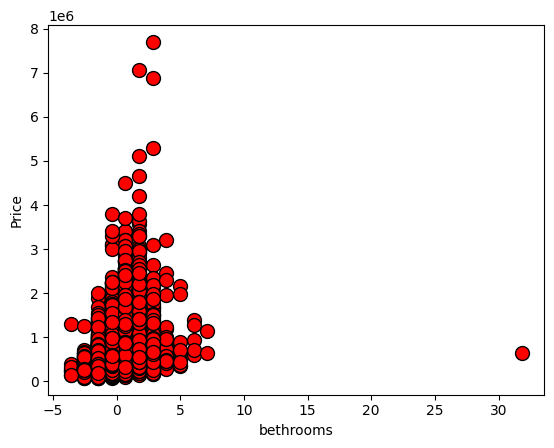

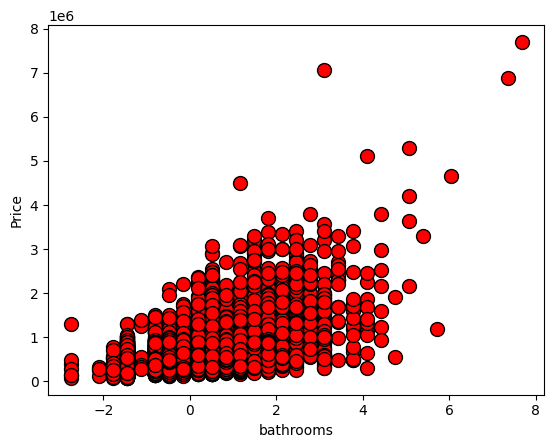

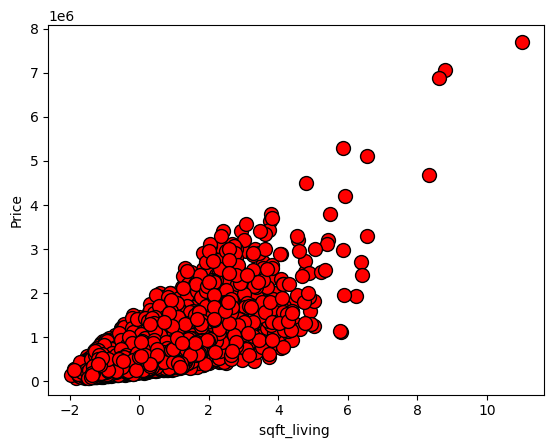

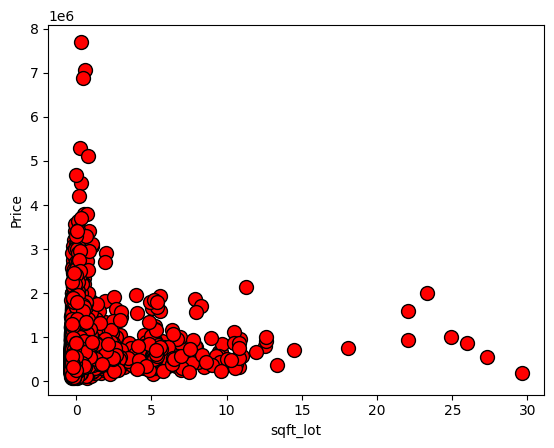

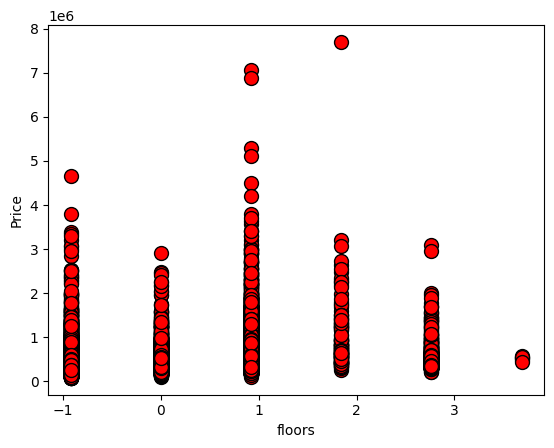

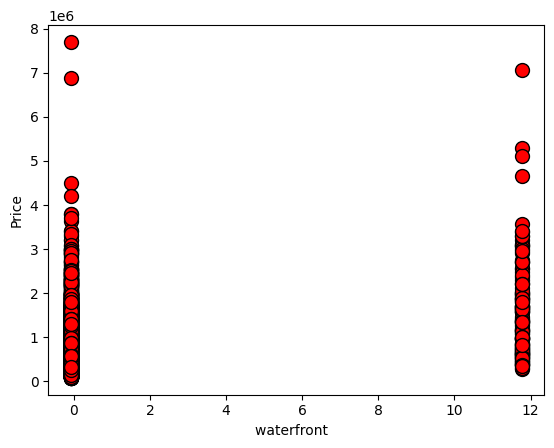

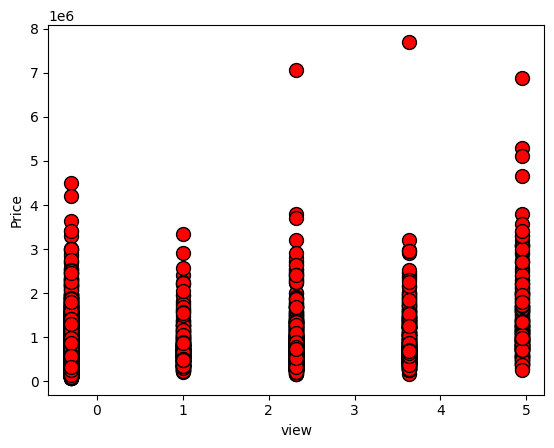

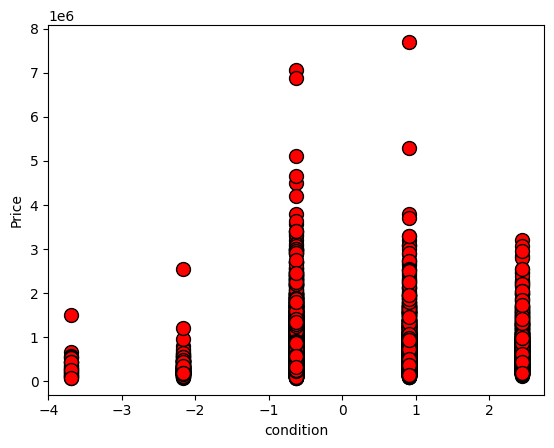

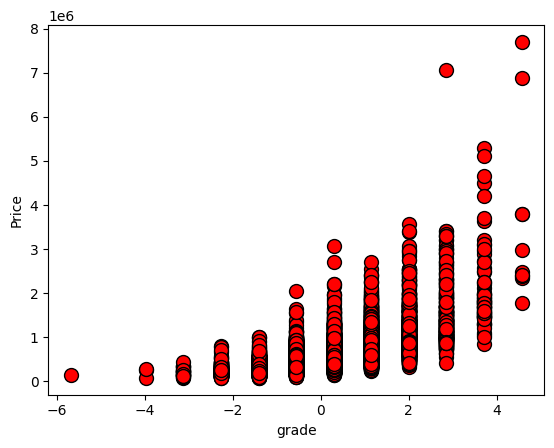

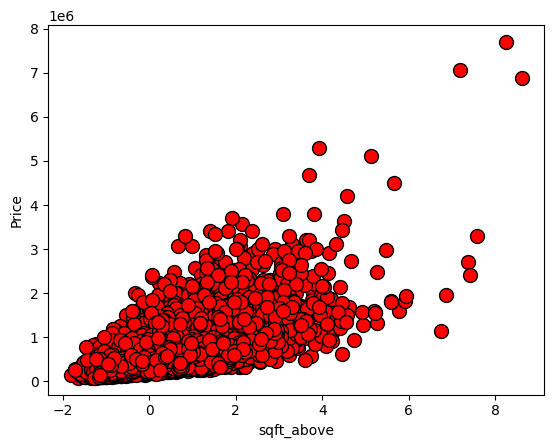

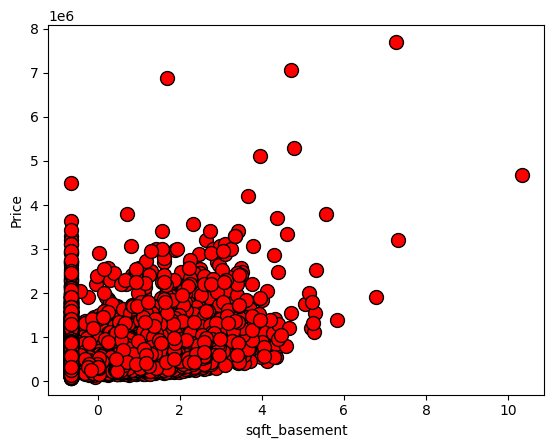

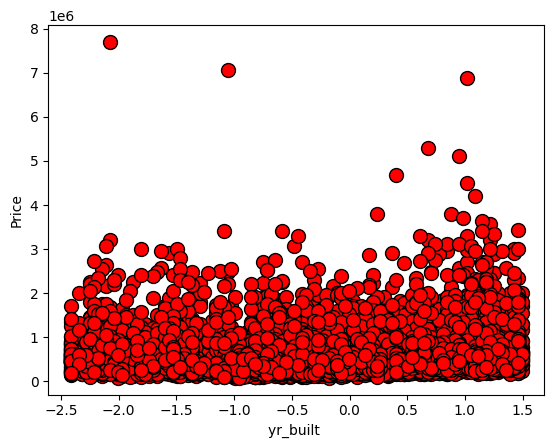

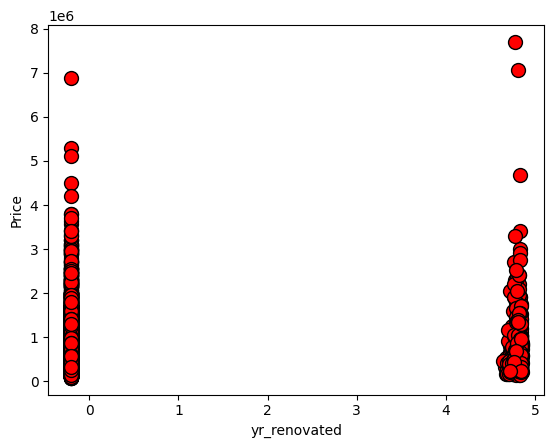

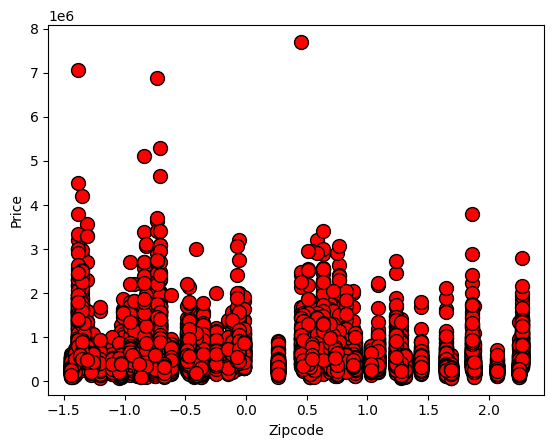

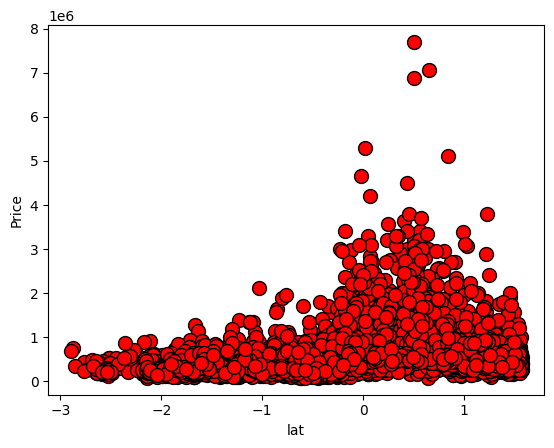

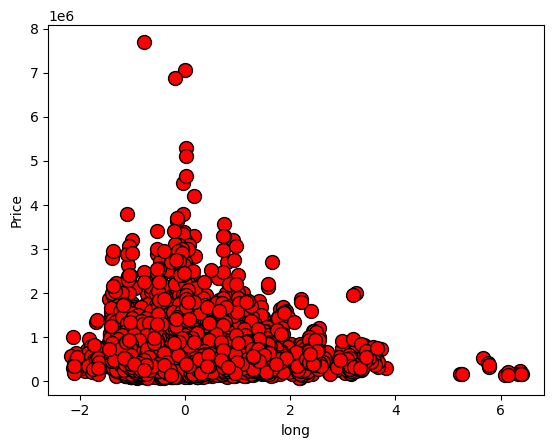

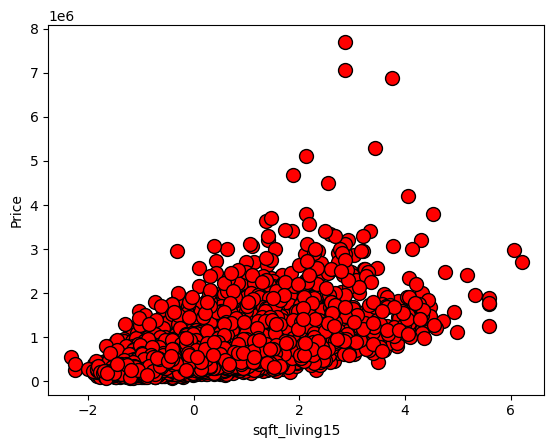

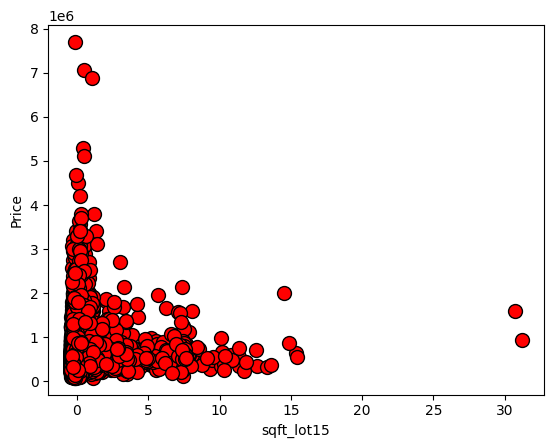

In [6]:

xlabel1 = "bethrooms"
xlabel2 = "bathrooms"
xlabel3 = "sqft_living "
xlabel4 = "sqft_lot"
xlabel5 = "floors"
xlabel6 = "waterfront  "
xlabel7 = "view"
xlabel8 = "condition"
xlabel9 = "grade"
xlabel10 = "sqft_above"
xlabel11 = "sqft_basement"
xlabel12 = "yr_built "
xlabel13 = "yr_renovated"
xlabel14 = "Zipcode"
xlabel15 = "lat"
xlabel16 = "long"
xlabel17 = "sqft_living15"
xlabel18 = "sqft_lot15"

ylabel1 = "Price"
graficarDatos(X_norm[:, 0], y_regre, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y_regre, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y_regre, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y_regre, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y_regre, xlabel5, ylabel1)
graficarDatos(X_norm[:, 5], y_regre, xlabel6, ylabel1)
graficarDatos(X_norm[:, 6], y_regre, xlabel7, ylabel1)
graficarDatos(X_norm[:, 7], y_regre, xlabel8, ylabel1)
graficarDatos(X_norm[:, 8], y_regre, xlabel9, ylabel1)
graficarDatos(X_norm[:, 9], y_regre, xlabel10, ylabel1)
graficarDatos(X_norm[:, 10], y_regre, xlabel11, ylabel1)
graficarDatos(X_norm[:, 11], y_regre, xlabel12, ylabel1)
graficarDatos(X_norm[:, 12], y_regre, xlabel13, ylabel1)
graficarDatos(X_norm[:, 13], y_regre, xlabel14, ylabel1)
graficarDatos(X_norm[:, 14], y_regre, xlabel15, ylabel1)
graficarDatos(X_norm[:, 15], y_regre, xlabel16, ylabel1)
graficarDatos(X_norm[:, 16], y_regre, xlabel17, ylabel1)
graficarDatos(X_norm[:, 17], y_regre, xlabel18, ylabel1)
pass

1.4 Descenso por el gradiente

Primero agregamos valores unos a la matriz de X

1.4.1 Cálculo del costo $J(\theta)$

In [7]:
# No olvidarse agregar unos a la matriz de x

X_ready = np.concatenate([np.ones((m_regre, 1)), X_norm], axis=1)

#Imprimimos X_ready
print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_ready[:,0]', '  X_ready[:, 1]', '  X_ready[:, 2]', '  X_ready[:, 3]', '  X_ready[:, 4]', '  X_ready[:, 5]', '  X_ready[:, 6]', '  X_ready[:, 7]', '  X_ready[:, 8]', '  X_ready[:, 9]', '  X_ready[:, 10]', '  X_ready[:, 11]',
    '  X_ready[:, 12]', '  X_ready[:, 13]', '  X_ready[:, 14]', '  X_ready[:, 15]', '  X_ready[:, 16]', '  X_ready[:, 17]', '  X_ready[:, 18]'
))
print('-' * 292)

for i in range(10):
    print('{:10.0f}{:17.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:17.4f}{:15.4f}{:17.4f}{:17.4f}{:14.4f}{:17.4f}{:15.4f}{:17.4f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10], X_ready[i, 11],
        X_ready[i, 12], X_ready[i, 13], X_ready[i, 14], X_ready[i, 15], X_ready[i, 16], X_ready[i, 17], X_ready[i, 18]
    ))

X_ready[:,0]  X_ready[:, 1]  X_ready[:, 2]  X_ready[:, 3]  X_ready[:, 4]  X_ready[:, 5]  X_ready[:, 6]  X_ready[:, 7]  X_ready[:, 8]  X_ready[:, 9]  X_ready[:, 10]  X_ready[:, 11]  X_ready[:, 12]  X_ready[:, 13]  X_ready[:, 14]  X_ready[:, 15]  X_ready[:, 16]  X_ready[:, 17]  X_ready[:, 18]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
         1          -0.3953        -0.4745        -0.3239        -0.0439        -0.9196        -0.0850        -0.3059         0.9091         1.1502        -0.0073          -0.6563         0.4040          -0.2083          -0.6746       -1.3966           0.4423         1.1261           0.0134
         1          -1.4690        -1.4526        -1.1837        -0.2858        -0.9196        -0.0850        -0.3059      

In [8]:
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [9]:
theta=np.array([0.2, 3.0, 0.2,0.1, 3.0, 0.2,1.1, 2.0, 0.7,0.8, 5.8, 0.9,0.7, 2.0, 0.5,0.8, 1.0, 0.2,0.3])
theta1=np.array([0.1, 2.0, 0.5,0.2, 8.0, 0.7,1.3, 8.0, 1.7,0.7, 7.1, 0.6,0.6, 1.0, 0.3,0.9, 2.0, 0.12,0.7])

print(theta.shape[0])

print(f"--------------------------------------------------------------------------------------")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready, y_regre, theta)}")
print(f"--------------------------------------------------------------------------------------")
print(f"con theta:{ theta1 } se obtiene un costo de: {calcularCosto(X_ready, y_regre, theta1)}")

19
--------------------------------------------------------------------------------------
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1 2.  0.7 0.8 5.8 0.9 0.7 2.  0.5 0.8 1.  0.2
 0.3] se obtiene un costo de: 209918722469.17972
--------------------------------------------------------------------------------------
con theta:[0.1  2.   0.5  0.2  8.   0.7  1.3  8.   1.7  0.7  7.1  0.6  0.6  1.
 0.3  0.9  2.   0.12 0.7 ] se obtiene un costo de: 209917518342.74518


1.4.2 Descenso por el gradiente
El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico.

In [10]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.00009.

In [11]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(19)

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 6000
alpha = 0.0009

theta, J_historico = calcularDescensoGradiente(X_ready, y_regre, theta, alpha, num_ite)
print("--------------------------------------------------------------------------------------")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"--------------------------------------------------------------------------------------")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")



--------------------------------------------------------------------------------------
Los valores de theta calculados son:
theta 1: 535345.0735608457
theta 2: -27631.733612392036
theta 3: 31044.20025602564
theta 4: 76399.93213734984
theta 5: 3560.699484386974
theta 6: 5723.1664847865895
theta 7: 47261.91479742596
theta 8: 41200.95063715309
theta 9: 19722.70392122679
theta 10: 99251.42241149904
theta 11: 70378.65125647036
theta 12: 26195.219019784246
theta 13: -68538.17122545274
theta 14: 11782.455904042063
theta 15: -23794.425206640375
theta 16: 83070.80664827561
theta 17: -28206.859818088433
theta 18: 30100.297045157255
theta 19: -8051.261777095107
--------------------------------------------------------------------------------------
con un costo de: 19737807687.201534 


Se utilizan los parametros finales para grafical la linea.

1.5 Grafica de la convergencia del costo

graficamos el costo

In [8]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

NameError: name 'J_historico' is not defined

1.5.1 Grafica de la regresion lineal

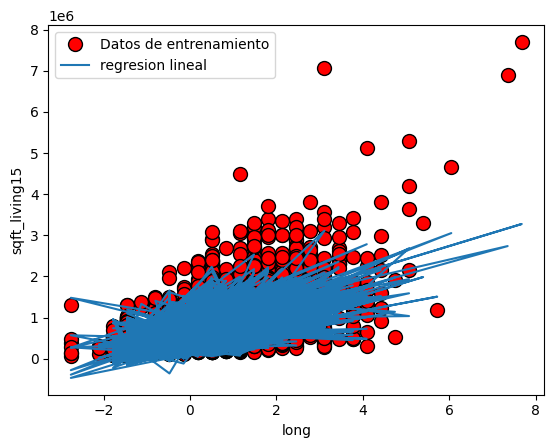

In [13]:
graficarDatos(X_ready[:, 2], y_regre , xlabel16, xlabel17)

pyplot.plot(X_ready[:,2], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

1.6 Ejemplos de Predicciones

Se creo una matriz con 11 ejemplos, donde se hace las predicciones correspondientes:

In [14]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_regre = np.array([
    [1,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650],
    [1,2,0.75,1020,1076,2,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357],
    [1,4,2.75,3555,6565,2,0,0,3,9,3555,0,2014,0,98053,47.6847,-122.017,3625,5637],
    [1,2,1,1040,13920,1,0,0,3,6,1040,0,1973,1867,98198,47.3756,-122.306,1100,7575],
    [1,4,1.75,1860,7350,1,0,0,4,7,1090,770,1977,1900,98031,47.3979,-122.174,1710,7350],
    [1,1,1,1060,54846,1,1,4,3,5,1060,0,1935,0,98070,47.4716,-122.445,2258,31762],
    [1,4,1.5,2220,9496,1,0,0,4,7,1490,730,1954,0,98004,47.6233,-122.206,1800,8286],
    [1,4,1.5,1560,6534,1,0,0,4,7,1560,0,1962,0,98007,47.6012,-122.152,1560,6969],
    [1,5,3,2510,4125,1.5,0,3,5,8,1590,920,1925,0,98144,47.5968,-122.29,2190,5415],
    [1,3,2.5,1680,2096,2,0,0,3,8,1380,300,2008,0,98117,47.6904,-122.37,1360,2096],
    [1,3,2.25,2020,3600,2,0,0,3,8,2020,0,1998,0,98033,47.6678,-122.165,2070,3699]
])

#creamos un vector parta almacenar cada Y premencinada 
y_pre = []
matriz_datos_copy = matriz_datos_regre.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo
for datos in matriz_datos_regre:
    datos[1:] = (datos[1:] - mu_regre) / sigma_regre


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_regre:
    y_pre.append(np.dot(datos, theta))

matriz_datos_copy = np.column_stack((matriz_datos_copy, y_pre))

nombres_columnas = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','Price']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# Imprimir la tabla con los valores
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

+----+------------+-------------+---------------+------------+----------+--------------+--------+-------------+---------+--------------+-----------------+------------+----------------+-----------+---------+----------+-----------------+--------------+------------------+
|    |   bedrooms |   bathrooms |   sqft_living |   sqft_lot |   floors |   waterfront |   view |   condition |   grade |   sqft_above |   sqft_basement |   yr_built |   yr_renovated |   zipcode |     lat |     long |   sqft_living15 |   sqft_lot15 |            Price |
+====+============+=============+===============+============+==========+==============+========+=============+=========+==============+=================+============+================+===========+=========+==========+=================+==============+==================+
|  1 |          3 |        1    |          1180 |       5650 |      1   |            0 |      0 |           3 |       7 |         1180 |               0 |       1955 |              0 |     9

1.7 Validaciones
Para hacer las validaciones correspondientes, primero se crea la funcion del Mean squeared error

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

1.7.1 Creacion de la funcion del error cuadratico medio

In [15]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pre)

1.7.2 haciendo calculo del error cuadratico medio

In [16]:
#haciendo x_test que es el 20% restante
m_ready_regre = len(y_regre_test)

#Concatenamos de unos a la primera posicion del X_test
X_ready_test = np.concatenate([np.ones((m_ready_regre, 1)), X_regre_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos_test in X_ready_test:
    datos_test[1:] = (datos_test[1:] - mu_regre) / sigma_regre

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []
for data_test_ready in X_ready_test:
    y_predicha.append(np.dot(data_test_ready, theta))

mse = mean_squared_error(y_predicha, y_regre_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 17853538284172.8
Raíz del Error Cuadrático Medio (RMSE) = 4225344.753292067
